<a href="https://colab.research.google.com/github/m1rzahan/EmailSpamDetector/blob/main/SENG352_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM MAIL DETECTION
In business or daily life, we encounter too many spam mails.
To solve this problem, I analyzed a dataset of spam and ham mails and there is a 96% probability that we can tell if the message is spam or ham.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn import metrics

Reading dataset from csv file.

In [ ]:
# loading the data from csv file to a pandas Dataframe
data = pd.read_csv('mail_dataset.csv')

In [ ]:
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham                   Dont forget to do your homeworks
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


Deleting null strings

In [ ]:
# delete null strings
mail_data = data.dropna()

In [ ]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Visualization of spam or ham data which shown as pie graph

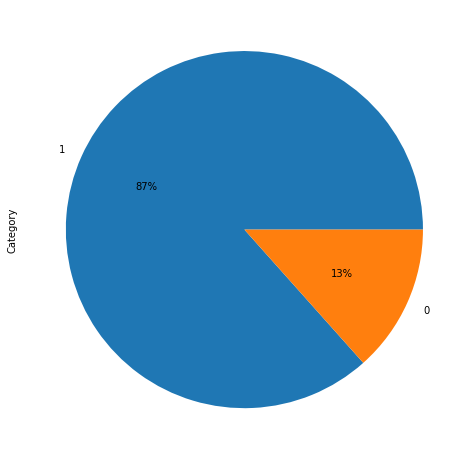

In [ ]:
# set spam is 0 and ham is 1

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1
plt.rcParams["figure.figsize"] = [8,10] 
mail_data.Category.value_counts().plot(kind='pie', autopct='%1.0f%%')


In [ ]:
# separating the data as message and category

X = mail_data['Message']

Y = mail_data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570                     Dont forget to do your homeworks
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Identify training and test variables, test size and random_state 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Converting strings into integers

In [ ]:

sc = StandardScaler()
textToNumbers = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_numbers = textToNumbers.fit_transform(X_train)
X_test_numbers = textToNumbers.transform(X_test)


Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

Classifier used 

In [ ]:
classifier = LogisticRegression(random_state=0, solver="liblinear")
classifier.fit(X_train_numbers, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
print(X_train)

1114    No I'm good for the movie, is it ok if I leave...
3589    If you were/are free i can give. Otherwise nal...
3095    Have you emigrated or something? Ok maybe 5.30...
1012          I just got home babe, are you still awake ?
3320                      Kay... Since we are out already
                              ...                        
4931    Hi, all friends are waiting for you to text th...
3264                              So u gonna get deus ex?
1653    For ur chance to win a £250 cash every wk TXT:...
2607    R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
2732    Mm feeling sleepy. today itself i shall get th...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_numbers)

  (0, 3408)	0.6418008618863358
  (0, 3944)	0.40459749284424307
  (0, 4760)	0.2937599690543961
  (0, 4471)	0.4933198981059812
  (0, 3090)	0.30778739607068667
  (1, 3839)	0.44104519567199485
  (1, 4558)	0.44104519567199485
  (1, 2525)	0.44104519567199485
  (1, 808)	0.44104519567199485
  (1, 4539)	0.4205121715674033
  (1, 2891)	0.21233477120404443
  (2, 3386)	0.5133141633463273
  (2, 1310)	0.34462014146959175
  (2, 431)	0.4077104256374456
  (2, 4277)	0.36445133334144264
  (2, 2494)	0.5133141633463273
  (2, 4760)	0.2349500626979615
  (3, 1131)	0.6477093412567694
  (3, 1153)	0.4517475179218396
  (3, 3365)	0.38464574503668536
  (3, 3107)	0.3611351631471391
  (3, 3762)	0.31309077607627067
  (4, 3789)	1.0
  (5, 3715)	0.6020708068994186
  (5, 7353)	0.7984426989330436
  :	:
  (4454, 348)	0.2816003924365337
  (4454, 110)	0.30005905677873096
  (4454, 2059)	0.25655354562534544
  (4454, 4473)	0.30005905677873096
  (4454, 646)	0.30005905677873096
  (4454, 372)	0.23956998249101863
  (4454, 790)	0.2816

In [ ]:
model = LogisticRegression()

Logistic Regression

In [ ]:

model.fit(X_train_numbers, Y_train)

LogisticRegression()

In [ ]:


predictionTraining = model.predict(X_train_numbers)


In [ ]:

predictionTest = model.predict(X_test_numbers)


Analyzing prediction metrics

In [ ]:
accuracy = metrics.accuracy_score(Y_test, predictionTest) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test, predictionTest) 
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, predictionTest) 
print("Recall score:",recall)

Accuracy score: 0.9668161434977578
Precision score: 0.9636363636363636
Recall score: 0.9989528795811519


In [ ]:
print(confusion_matrix(Y_test,predictionTest)) 
print(classification_report(Y_test,predictionTest)) 
print(accuracy_score(Y_test,predictionTest))

[[124  36]
 [  1 954]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       160
           1       0.96      1.00      0.98       955

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

0.9668161434977578


In [ ]:
def detectEmail(inputMail):
  input_data_features = textToNumbers.transform(inputMail)
  prediction = model.predict(input_data_features)
  print(prediction)


  if (prediction[0]==1):
    
    print('Not spam mail : ',inputMail)

  else:
    print('Spam mail : ',inputMail)

ham_mail =  ["Hi everyone! Dont forget to upload your assignments"]
spam_mail = ["You are a winner   You earned 5 Bitcoin ! 2 claim 0871277810910p/min"]
detectEmail(ham_mail)
detectEmail(spam_mail)




[1]
Not spam mail :  ['Hi everyone! Dont forget to upload your assignments']
[0]
Spam mail :  ['You are a winner   You earned 5 Bitcoin ! 2 claim 0871277810910p/min']
